In [1]:
import sys
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt

if cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

Image loaded successfully.
Image shape: (500, 500, 3)


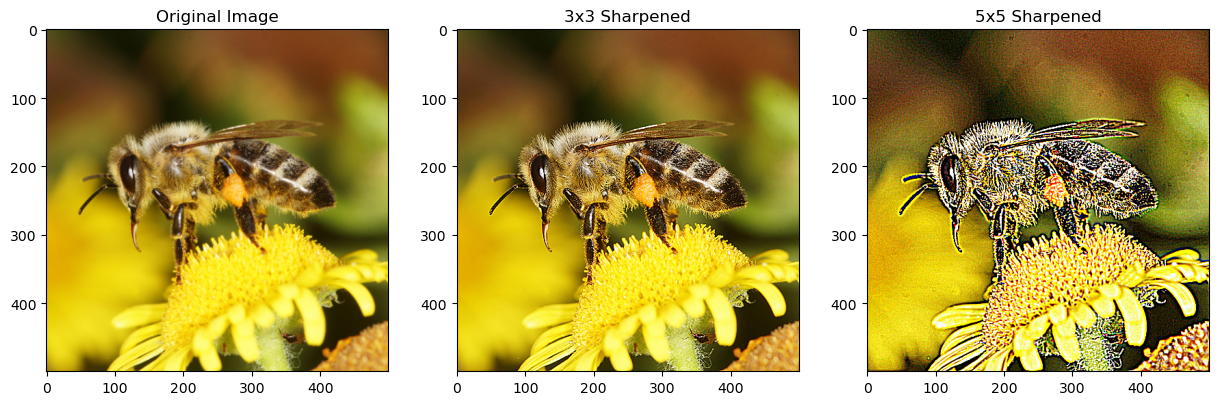

In [2]:
image = cv.imread('images/native-bee.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not read the image file.")
else:
    print("Image loaded successfully.")
    print("Image shape:", image.shape)


    kernel_3x3 = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])

    kernel_5x5 = np.array([
        [-1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1],
        [-1, -1, 25, -1, -1],
        [-1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1]
    ])

    sharpened_3x3 = cv.filter2D(image, -1, kernel_3x3)
    sharpened_5x5 = cv.filter2D(image, -1, kernel_5x5)


    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.subplot(1, 3, 2), plt.imshow(cv.cvtColor(sharpened_3x3, cv.COLOR_BGR2RGB)), plt.title('3x3 Sharpened')
    plt.subplot(1, 3, 3), plt.imshow(cv.cvtColor(sharpened_5x5, cv.COLOR_BGR2RGB)), plt.title('5x5 Sharpened')
    plt.show()

In [5]:
#2 (No noisy lena)
noise_image = cv.imread('images/noisy_lena.png')

# Check if the image was loaded successfully
if noise_image is None:
    print("Error: Could not read the image file.")
else:
    print("Image loaded successfully.")
    print("Image shape:", noise_image.shape)

Error: Could not read the image file.


In [ ]:
#3
boat_image = cv.imread('images/boat.jpg')
gray_boat = cv.cvtColor(boat_image, cv.COLOR_BGR2GRAY)


_, thresh = cv.threshold(gray_boat, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Invert the thresholded image if the black regions are to be highlighted
thresh = cv.bitwise_not(thresh)


contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


output_image = boat_image.copy()
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(output_image, (x, y), (x+w, y+h), (0, 255, 0), 2)


cv.imshow('Original Image', boat_image)
cv.imshow('Thresholded Image', thresh)  
cv.imshow('Segmented Image', output_image)
cv.waitKey(0)
cv.destroyAllWindows()